# MÔ HÌNH HỒI QUY TUYẾN TÍNH

***Sinh viên sử dụng dulieuxettuyendaihoc.csv để xây dựng mô hình dự 
báo kết quả điểm thi đại học môn 1 (DH1) dựa trên mô hình hồi quy tuyến tính, với tỉ lệ tập 
huấn luyện và kiểm tra là 80% và 20%. Biết rằng đề dự báo thì người ta dựa trên các thông 
tin: trung bình điểm số trong các học kì của học sinh các năm trung học phổ thông***

In [1]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('D:\Source Code\Data_Analysis_Programming\OnTap_CK\dulieuxettuyendaihoc.csv', header=0,delimiter=',')

In [6]:
df.head(5)

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,...,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,...,6.6,7.6,5.9,F,NaN,2NT,3.25,3.25,4.50,A1
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,...,6.6,6.1,4.4,M,NaN,1,6.00,4.00,3.50,C
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,...,7.9,8.1,4.6,M,NaN,1,5.00,6.75,4.00,C
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,...,7.1,7.3,7.4,M,NaN,1,4.25,4.25,5.25,D1
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,...,6.1,7.5,7.2,M,NaN,2NT,4.25,4.50,5.00,A


In [7]:
df['TB10_1'] = df.loc[: , "T1":"N1"].mean(axis=1)
df['TB10_2'] = df.loc[: , "T2":"N2"].mean(axis=1)
df['TB11_1'] = df.loc[: , "T3":"N3"].mean(axis=1)
df['TB11_2'] = df.loc[: , "T4":"N4"].mean(axis=1)
df['TB12_1'] = df.loc[: , "T5":"N5"].mean(axis=1)
df['TB12_2'] = df.loc[: , "T6":"N6"].mean(axis=1)
df['TB_DH'] = df.loc[: , "DH1":"DH3"].mean(axis=1)

In [8]:
feature_df = df[['TB10_1', 'TB10_2', 'TB11_1', 'TB11_2','TB12_1', 'TB12_2', 'DH1']]

In [9]:
feature_df

,TB10_1,TB10_2,TB11_1,TB11_2,TB12_1,TB12_2,DH1
0,6.9750,7.5500,7.0375,6.7250,6.2625,6.8500,3.25
1,4.5125,5.3750,4.6875,5.2750,4.8250,5.1500,6.00
2,5.9750,5.4375,4.7500,5.5750,4.9250,6.3250,5.00
3,6.2625,5.3125,6.0875,5.6500,5.5500,6.8500,4.25
4,6.5625,6.4625,7.1000,6.5250,5.9125,6.9125,4.25
...,...,...,...,...,...,...,...
95,7.2625,7.2875,6.9875,7.1250,6.3500,6.7625,5.25
96,5.0125,5.1875,4.8875,5.3875,5.6250,6.4625,5.25
97,6.9375,7.7375,7.8375,7.9000,7.3125,7.6500,7.00
98,4.2875,4.8625,6.3375,5.4375,5.0500,5.4500,5.00


In [12]:
from sklearn.model_selection import train_test_split
X = feature_df[['TB10_1', 'TB10_2', 'TB11_1', 'TB11_2','TB12_1', 'TB12_2']]
y = feature_df[['DH1']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
X_train

,TB10_1,TB10_2,TB11_1,TB11_2,TB12_1,TB12_2
2,5.9750,5.4375,4.7500,5.5750,4.9250,6.3250
73,4.6500,5.6125,5.7125,5.8000,5.0125,5.3250
97,6.9375,7.7375,7.8375,7.9000,7.3125,7.6500
62,7.3375,7.4000,6.8625,7.3125,7.1875,7.2250
19,7.0250,6.3125,6.6750,5.7750,6.2500,6.5625
...,...,...,...,...,...,...
75,4.3500,4.3125,3.8500,4.9250,4.7125,4.9750
9,6.7500,7.2125,7.1875,6.7375,6.7500,6.9625
72,6.3750,5.9875,5.8125,5.4750,5.8375,6.3250
12,7.5625,6.8875,7.8750,7.5125,7.8875,7.3000


In [16]:
pip install statsmodels

     ---------------------------------------- 9.0/9.0 MB 10.1 MB/s eta 0:00:00
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
import statsmodels.api as sm
X_train = sm.tools.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DH1   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.2549
Date:                Mon, 05 Dec 2022   Prob (F-statistic):              0.956
Time:                        17:33:49   Log-Likelihood:                -143.58
No. Observations:                  80   AIC:                             301.2
Df Residuals:                      73   BIC:                             317.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2182      1.579      2.038      0.045       0.072       6.365
TB10_1        -0.3828      0.399     -0.959      0.341      -1.178       0.413
TB10_2         0.2916      0.499      0.584      0.561      -0.703       1.287
TB11_1         0.3023      0.443      0.683      0.497      -0.580       1.185
TB11_2        -0.3157      0.481     -0.656      0.514      -1.275       0.644
TB12_1        -0.0661      0.506     -0.131      0.896      -1.075       0.943
TB12_2         0.2368      0.502      0.472      0.638      -0.763       1.237
==============================================================================
Omnibus:                        4.782   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                2.845
Skew:                           0.253   Prob(JB):                        0.241
Kurtosis:                       2.228   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
yy, XX = dmatrices('DH1 ~ TB10_1+TB10_2+TB11_1+TB11_2+TB12_1+TB12_2', data=pd.concat([y_train, X_train], axis=1), return_type='dataframe')

In [20]:

vif = pd.DataFrame()
vif['variable'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
print(vif)

    variable        VIF
0  Intercept  85.828050
1     TB10_1   5.373988
2     TB10_2   7.615580
3     TB11_1   6.231797
4     TB11_2   6.143017
5     TB12_1   6.316919
6     TB12_2   4.799811


count    8.000000e+01
mean     4.629630e-15
std      1.465272e+00
min     -2.637829e+00
25%     -1.197879e+00
50%     -1.273956e-01
75%      1.191014e+00
max      3.262040e+00
dtype: float64


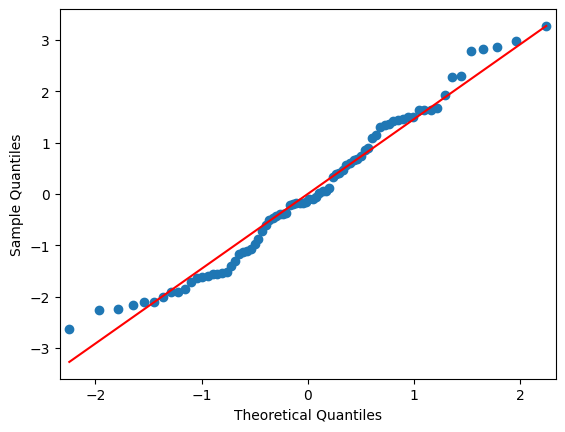

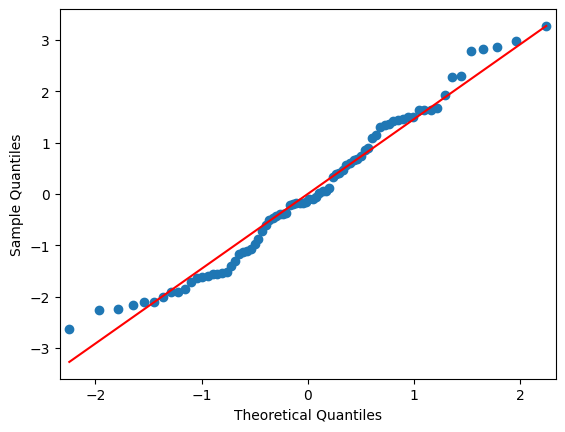

In [21]:
from scipy import stats
import seaborn as sns
print(model.resid.describe())
sm.qqplot(model.resid, line='s')

eval_env: 1


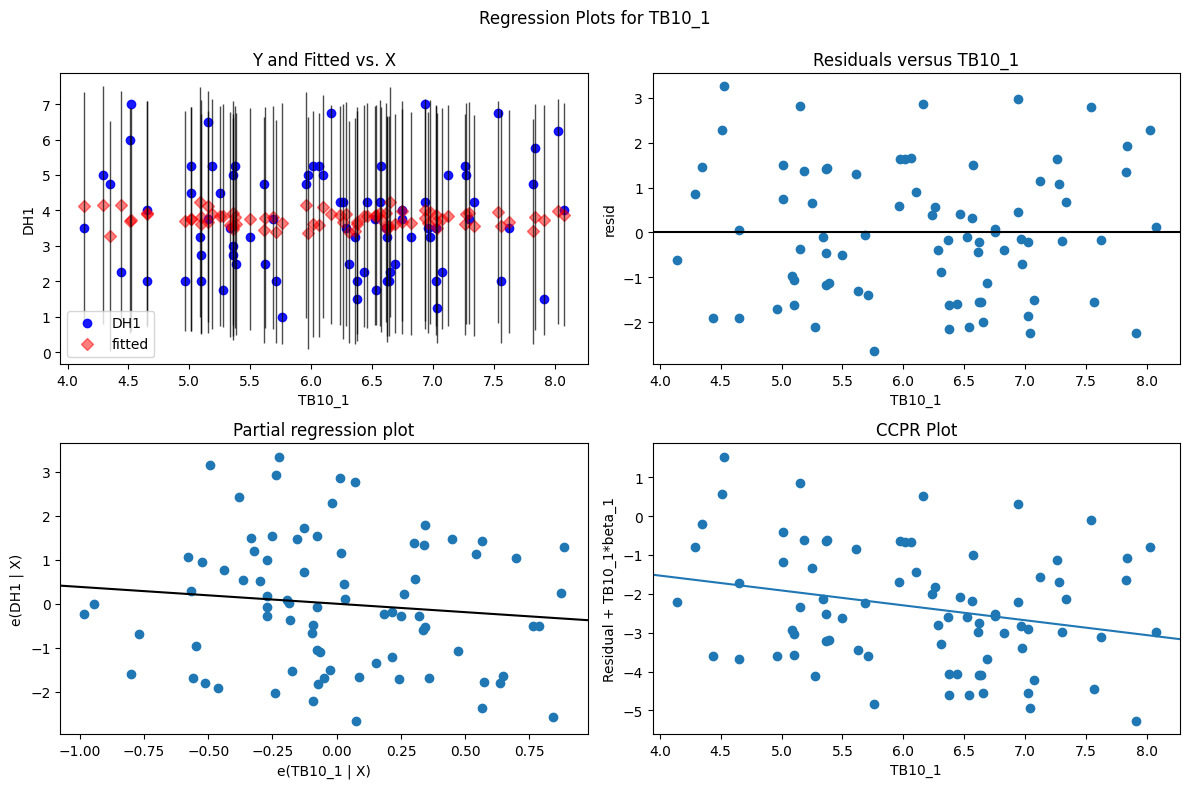

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'TB10_1', fig=fig)

In [23]:
from statsmodels.tools.eval_measures import rmse
import numpy as np

In [24]:
# Training dataset
predictions_train = model.predict(X_train)
rmse_train = rmse(y_train, predictions_train)
print("RMSE on train dataset: ",np.mean(rmse_train))

# Training dataset
X_test = sm.tools.add_constant(X_test)
predictions_test = model.predict(X_test)
rmse_test = rmse(y_test, predictions_test)
print("RMSE on test dataset: ",np.mean(rmse_test))

RMSE on train dataset:  1.4861525160786988
RMSE on test dataset:  1.2216747357333166
